In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tone_func(t):
    if 3.0 > t % 3 > 2.7:
        return 0                   # Silince (single missing tone)
    else:
        return (t % 0.25) < 0.0625 # Periodic tone

In [34]:
fs = 44100
ts = np.arange(0, 18, 1.0 / fs)

stimulus = np.array(list(map(tone_func, ts)))

flt = 0.5 * (1.0 + np.cos(np.linspace(-np.pi, np.pi, 5e-3 * fs)))
stimulus = np.convolve(stimulus, flt, 'same') / np.sum(flt)

sine = np.sin(ts * 2.0 * np.pi * 440)
stimulus = 0.25 * stimulus * sine

(-0.1, 0.1)

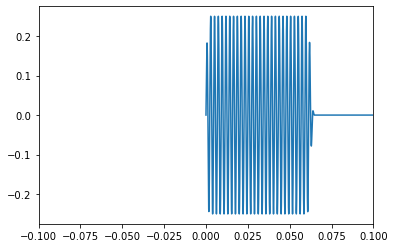

In [37]:
fig, ax = plt.subplots()
ax.plot(ts, stimulus)
ax.set_xlim(-0.1, 0.1)

In [38]:
import sounddevice as sd
sd.play(stimulus, fs, blocking=True)